In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data and change theme.
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)
gender_submission = pd.read_csv("gender_submission.csv", low_memory=False)
plt.style.use('dark_background') 

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling the missing data

In [6]:
train['Age'] = train['Age'].interpolate()

In [7]:
cols = ['Name','Ticket','Cabin']
train = train.drop(cols, axis=1)

In [8]:
train['Embarked'] = train['Embarked'].fillna(method='ffill')
train['Embarked'].isnull().sum()

0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
train.shape

(891, 9)

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


# Let's Visualize them

In [13]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

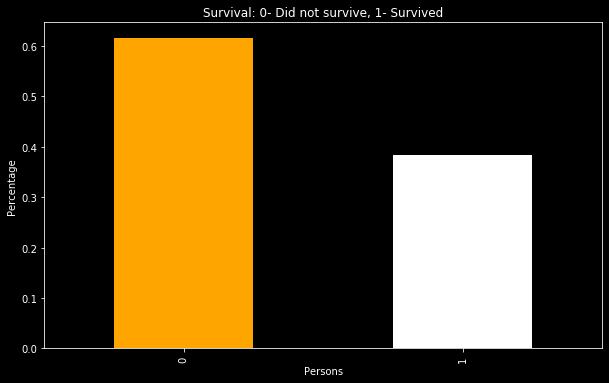

In [14]:
fig = plt.figure(figsize=(10, 6))
    
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=1.0, color=['orange', 'white'])
plt.title("Survival: 0- Did not survive, 1- Survived")
plt.xlabel("Persons")
plt.ylabel("Percentage");

male      577
female    314
Name: Sex, dtype: int64


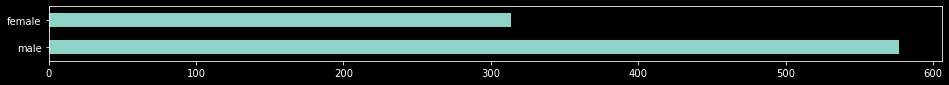

In [15]:
fig = plt.figure(figsize=(16, 1))
train['Sex'].value_counts().plot(kind = 'barh', edgecolor='None', alpha = 1.0)
print(train['Sex'].value_counts())

In [16]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
train['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
train.Age.value_counts()

24.000000    32
30.000000    29
22.000000    28
18.000000    28
19.000000    27
             ..
8.886667      1
39.666667     1
0.920000      1
34.666667     1
48.666667     1
Name: Age, Length: 155, dtype: int64

In [19]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

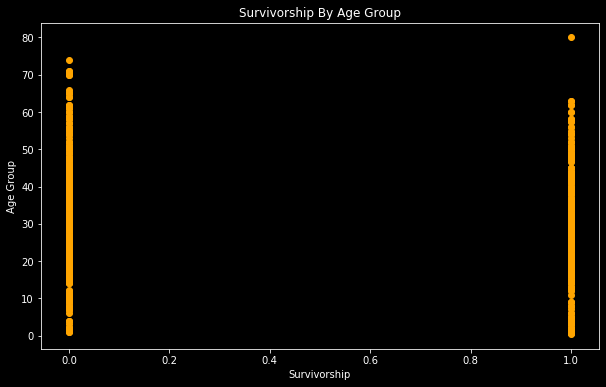

In [20]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(train['Survived'], train['Age'], alpha=1.0, color = 'orange')
plt.xlabel("Survivorship")
plt.ylabel("Age Group")
plt.title("Survivorship By Age Group");

        0 - Didn't Survived                                    1 - Survived

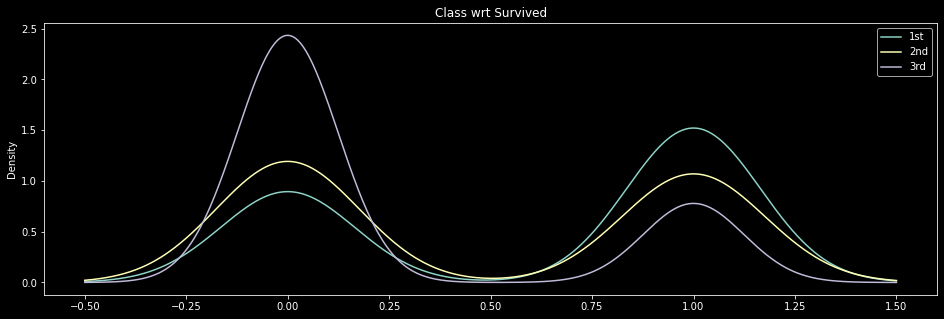

In [21]:
fig = plt.figure(figsize=(16, 5))
for x in [1, 2, 3]:
    train.Survived[train.Pclass == x].plot(kind = 'kde')
plt.title("Class wrt Survived")
plt.legend(("1st", "2nd", "3rd"))

from the graph:

              the 1st class (green) recorded the least death & the highest in survival.

              the 2nd class (yellow) recorded an avearage death & average in survival.

              the 3rd class (voilet) recorded the highest death & the least survival.

In [22]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
train.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

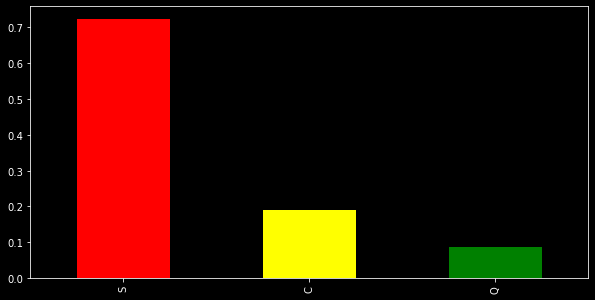

In [24]:
fig = plt.figure(figsize=(10, 5))
train.Embarked.value_counts(normalize=True).plot(kind='bar', color= ['red', 'yellow', 'green'])

              C = Cherbourg, Q = Queenstown, S = Southampton

# Lets Train Our Data

In [25]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,22.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [26]:
X = train[['Age', 'Fare']].values # Put them this way'[]' instead of '.' format to prevent "inconsistent numbers of samples" 
y = train[['Survived']].values

# X we can also plot us, X = train.iloc[:,4].values, train.iloc[:, 7]
# y also as, y = train.iloc[:, 1]

In [27]:
X.shape

(891, 2)

In [28]:
y.shape

(891, 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
# Always remember to arrange X's on one side, and y's on another side to prevent Value_error : ?%

In [30]:
# Feature Scaling our data
# NB = leanrt feature scaling prevent particular features from dominating other features! No choice i've to implement it^_^LOL
# it improves the performance of our model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)

C:\Users\Max_m\Miniconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting our test set

In [32]:
y_pred = logR.predict(X_test)

# Calculating the accuracy

In [33]:
print("Accuracy: %d", (logR.score(X_test, y_test)))

Accuracy: %d 0.695067264573991


# Evaluating the model using confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[134   5]
 [ 63  21]]


The result is telling us that we have 134 + 21 correction predictions and 63 + 5 inccorect predictions. 

In [35]:
(134+21)/(134+21+63+5) # 69.5 (70) % ACCURACY

0.695067264573991

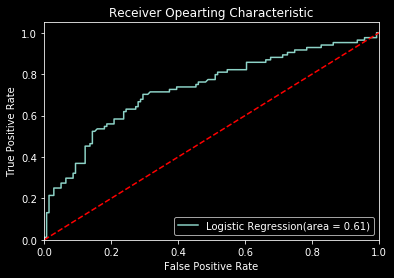

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logR.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--') # x, y, color red with broken lines
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Opearting Characteristic")
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

I learnt a good classifier stays away from the red broken line as far as possible.

that is the blue line should move further to the left top corner